# 10-year Portfolio Returs Simulation


## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import hvplot.pandas
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\dlevs\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Load Environment Variables and Set Up Alpaca Environment

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

## Set Timeframe, Start Date and End Date

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-11-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-02", tz="America/New_York").isoformat()

# Set the ticker information
# tickers = ["AAPL","MSFT", "AMZN", "FB", "GOOG", "GOOGL","BRK.B", "JNJ", "PG", "NVDA", "BND"]


# Display sample data
# df_ticker.head()
# alpaca_df(tickers)

## Define Function that Returns a Data Frame from Alpaca for the List of Securities

In [6]:
# Get 5 year's worth of historical price data
def alpaca_df(tickers):
    df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
    ).df
    
    return df_ticker

## Define ETF portfolios Corresponding to Various Levels of Risk Tolerance

### US Portfolios

In [7]:
#100% in Bonds:
#US Very Conservative:
#Tickers
us_vc = ["AGG"]
#Weights
us_vc_w = [1.0]

#20% in Stocks, 80% in Bonds
#US Conservative:
#Tickers
us_c = ["IVV","AGG"]
#Weights
us_c_w = [0.2, 0.8]

#50% in Stocks, 50% in Bonds
#US Balanced:
#Tickers
us_b = ["IVV","AGG"]
#Weights
us_b_w = [0.5, 0.5]

#80% in Stocks, 20% in Bonds
#US Growth:
#Tickers
us_g = ["IVV","AGG"]
#Weights
us_g_w = [0.8, 0.2]

#100% in Stocks
#US Aggressive Growth:
#Tickers
us_ag = ["IVV"]
#Weights
us_ag_w = [1.0]

### International Portfolios (iShare Asset Allocation ETFs with Global Scope and Automatic Rebalancing)

In [8]:
#70% in Stocks and 30% Bonds
#International Core Conservative Allocation:
#Tickers
intl_cc = ["AOK"]
#Weights
intl_cc_w = [1.0]

#60% in Stocks and 40% Bonds
#International Core Moderate Allocation:
#Tickers
intl_cm = ["AOM"]
#Weights
intl_cm_w = [1.0]

#60% in Stocks and 40% Bonds
#International Core Growth Allocation:
#Tickers
intl_cg = ["AOR"]
#Weights
intl_cg_w = [1.0]

#80% in Stocks and 20% Bonds
#International Core Aggressive Allocation:
#Tickers
intl_ca = ["AOK"]
#Weights
intl_ca_w = [1.0]

## Signature Portfolios


In [9]:

#Vishal:
#Tickers
sig_vishal = ["C","GOOGL","VZ","AMZN","JNJ","HON","WMT","V","MRK","DIS"]
#Weights
sig_vishal_w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

#Rimi:
#Tickers
sig_rimi = ["C","GOOGL","VZ","AMZN","JNJ","HON","WMT","V","MRK","DIS"]
#Weights
sig_rimi_w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

#Greg:
#Tickers
sig_greg = ["C","GOOGL","VZ","AMZN","JNJ","HON","WMT","V","MRK","DIS"]
#Weights
sig_greg_w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


#Jonathan:
#Tickers
sig_jonathan = ["C","GOOGL","VZ","AMZN","JNJ","HON","WMT","V","MRK","DIS"]
#Weights
sig_jonathan_w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


#Dimi:
#Tickers
sig_dimi = ["AAPL","MSFT", "AMZN", "FB", "GOOG", "GOOGL","BRK.B", "JNJ", "PG", "NVDA"]
#Weights
sig_dimi_w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


# Create Data Frames for All Portfolios

In [10]:
## Simulate five year portfolio growth with evenly-distributed stock investments:
## Configure the Instance of MCSimulation

In [11]:
# Creating DFs for the following portfolios:

'US'
# us_very_conservative = ["AGG"]
tickers = us_vc
us_vc_df=alpaca_df(tickers)
# us_vc_df.head()

# us_conservative = ["IVV","AGG"]
tickers = us_c
us_c_df=alpaca_df(tickers)
# us_c_df.head()

# us_balanced = ["IVV","AGG"]
tickers = us_b
us_b_df=alpaca_df(tickers)
# us_b_df.head()

# us_growth = ["IVV","AGG"]
tickers = us_g
us_g_df=alpaca_df(tickers)
# us_g_df.head()

# us_aggressive_growth = ["IVV"]
tickers = us_ag
us_ag_df=alpaca_df(tickers)
# us_ag_df.head()

'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
tickers = intl_cc
intl_cc_df=alpaca_df(tickers)
# intl_cc_df.head()

# intl_core_moderate_all = ["AOM"]
tickers = intl_cm
intl_cm_df=alpaca_df(tickers)
# intl_cm_df.head()

# intl_core_growth_all = ["AOR"]
tickers = intl_cg
intl_cg_df=alpaca_df(tickers)
# intl_cg_df.head()

# intl_core_aggressive_all = ["AOK"]
tickers = intl_ca
intl_ca_df=alpaca_df(tickers)
# intl_ca_df.head()

'SIGNATURE'
# Vishal
tickers = sig_vishal
sig_vishal_df=alpaca_df(tickers)
# sig_vishal_df.head()

# Rimi
tickers = sig_rimi
sig_rimi_df=alpaca_df(tickers)
# sig_rimi_df.head()

# Greg
tickers = sig_greg
sig_greg_df=alpaca_df(tickers)
# sig_greg_df.head()

# Jonathanl
tickers = sig_jonathan
sig_jonathan_df=alpaca_df(tickers)
# sig_jonathan_df.head()

# Dimi
tickers = sig_dimi
sig_dimi_df=alpaca_df(tickers)
# sig_dimi_df.head()


## Define Monte Carlo Simulations

### Set Parmeters for Monte Carlo Simulations

In [12]:
#Number of Simulations
ns=50

#Number of Trading Days
ntd=252*1

# Set initial investment
initial_investment = 10000

In [13]:
# #1.
# 'US'
# # us_very_conservative = ["AGG"]
# # us_vc_df
# # us_vc_w

# MC_US_VC = MCSimulation(
#     portfolio_data = us_vc_df,
#     weights = us_vc_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )

# # Print the simulation input data
# MC_US_VC.portfolio_data.head()

## Run the Monte Carlo Simulation

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


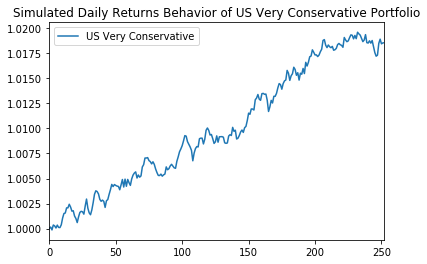

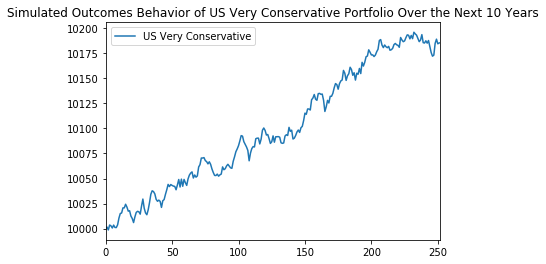

In [14]:
#1.
'US'
# us_very_conservative = ["AGG"]
# us_vc_df
# us_vc_w

us_vc_title="US Very Conservative"

MC_US_VC = MCSimulation(
    portfolio_data = us_vc_df,
    weights = us_vc_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_US_VC.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
us_vc_tbl = MC_US_VC.summarize_cumulative_return()

# Compute mean from the simulated daily returns
us_vc_MEAN_returns_data = {"mean": list(MC_US_VC.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
us_vc_simulated_MEAN_returns_df = pd.DataFrame(us_vc_MEAN_returns_data)
us_vc_simulated_MEAN_returns_df=us_vc_simulated_MEAN_returns_df.rename(columns={"mean":"US Very Conservative"})

# Use the `plot` function to visually analyze the trajectory 
us_vc_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {us_vc_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
us_vc_cumulative_pnl = initial_investment * us_vc_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
us_vc_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {us_vc_title} Portfolio Over the Next 10 Years")


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


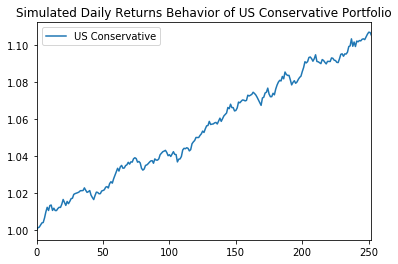

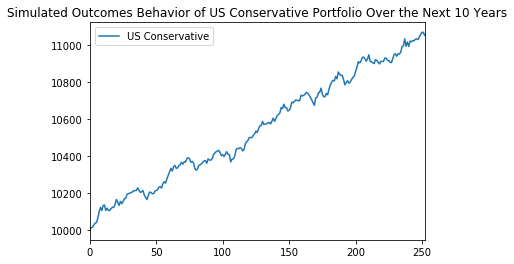

In [15]:
#2.
'US'
# us_conservative = ["IVV","AGG"]
# us_c_df
# us_c_w

us_c_title="US Conservative"

MC_US_C = MCSimulation(
    portfolio_data = us_c_df,
    weights = us_c_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_US_C.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
us_c_tbl = MC_US_C.summarize_cumulative_return()

# Compute mean from the simulated daily returns
us_c_MEAN_returns_data = {"mean": list(MC_US_C.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
us_c_simulated_MEAN_returns_df = pd.DataFrame(us_c_MEAN_returns_data)
us_c_simulated_MEAN_returns_df=us_c_simulated_MEAN_returns_df.rename(columns={"mean":"US Conservative"})

# Use the `plot` function to visually analyze the trajectory 
us_c_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {us_c_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
us_c_cumulative_pnl = initial_investment * us_c_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
us_c_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {us_c_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


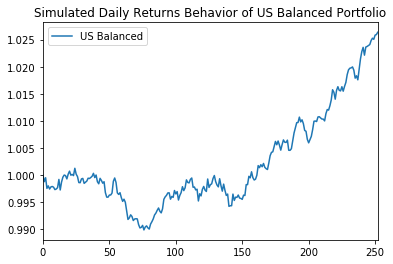

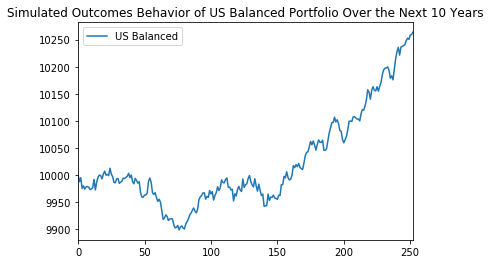

In [16]:
#3.
'US'
# us_balanced = ["IVV","AGG"]
# us_b_df
# us_b_w

us_b_title="US Balanced"

MC_US_B = MCSimulation(
    portfolio_data = us_b_df,
    weights = us_b_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_US_B.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
us_b_tbl = MC_US_B.summarize_cumulative_return()

# Compute mean from the simulated daily returns
us_b_MEAN_returns_data = {"mean": list(MC_US_B.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
us_b_simulated_MEAN_returns_df = pd.DataFrame(us_b_MEAN_returns_data)
us_b_simulated_MEAN_returns_df=us_b_simulated_MEAN_returns_df.rename(columns={"mean":"US Balanced"})

# Use the `plot` function to visually analyze the trajectory 
us_b_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {us_b_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
us_b_cumulative_pnl = initial_investment * us_b_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
us_b_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {us_b_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


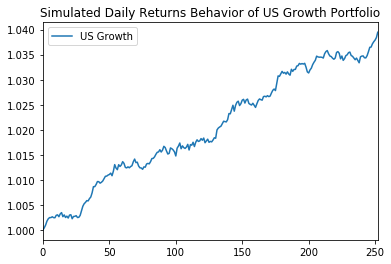

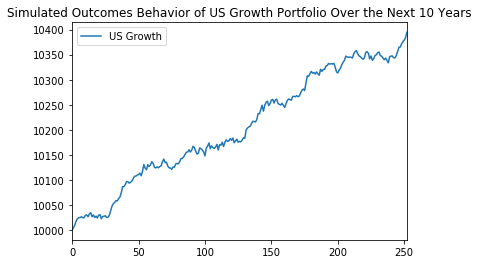

In [17]:
#4.
'US'
# us_growth = ["IVV","AGG"]
# us_g_df
# us_g_w

us_g_title="US Growth"

MC_US_G = MCSimulation(
    portfolio_data = us_g_df,
    weights = us_g_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_US_G.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
us_g_tbl = MC_US_G.summarize_cumulative_return()

# Compute mean from the simulated daily returns
us_g_MEAN_returns_data = {"mean": list(MC_US_G.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
us_g_simulated_MEAN_returns_df = pd.DataFrame(us_g_MEAN_returns_data)
us_g_simulated_MEAN_returns_df=us_g_simulated_MEAN_returns_df.rename(columns={"mean":"US Growth"})

# Use the `plot` function to visually analyze the trajectory 
us_g_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {us_g_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
us_g_cumulative_pnl = initial_investment * us_g_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
us_g_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {us_g_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


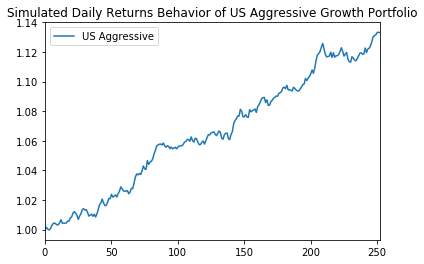

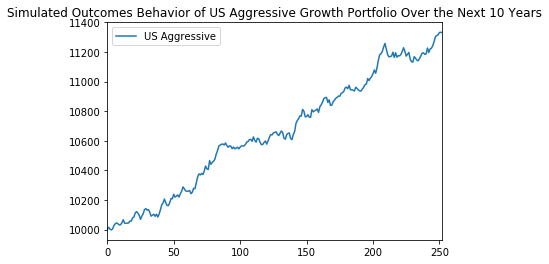

In [18]:
#5.
'US'
# us_aggressive_growth = ["IVV"]
# us_ag_df
# us_ag_w

us_ag_title="US Aggressive Growth"

MC_US_AG = MCSimulation(
    portfolio_data = us_ag_df,
    weights = us_ag_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_US_AG.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
us_ag_tbl = MC_US_AG.summarize_cumulative_return()

# Compute mean from the simulated daily returns
us_ag_MEAN_returns_data = {"mean": list(MC_US_AG.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
us_ag_simulated_MEAN_returns_df = pd.DataFrame(us_ag_MEAN_returns_data)
us_ag_simulated_MEAN_returns_df=us_ag_simulated_MEAN_returns_df.rename(columns={"mean":"US Aggressive"})

# Use the `plot` function to visually analyze the trajectory 
us_ag_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {us_ag_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
us_ag_cumulative_pnl = initial_investment * us_ag_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
us_ag_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {us_ag_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


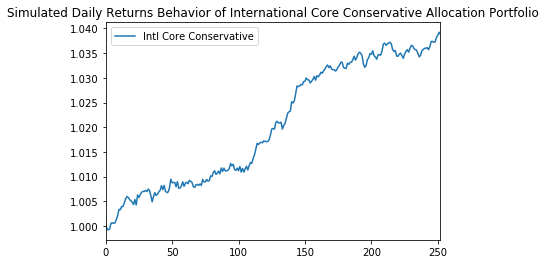

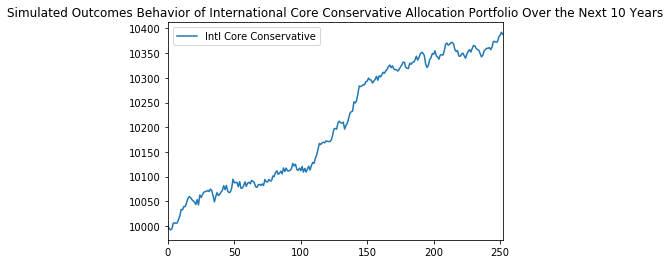

In [19]:
#6.
'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
# intl_cc_df
# intl_cc_w

intl_cc_title="International Core Conservative Allocation"

MC_INTL_CC = MCSimulation(
    portfolio_data = intl_cc_df,
    weights = intl_cc_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CC.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cc_tbl = MC_INTL_CC.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cc_MEAN_returns_data = {"mean": list(MC_INTL_CC.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cc_simulated_MEAN_returns_df = pd.DataFrame(intl_cc_MEAN_returns_data)
intl_cc_simulated_MEAN_returns_df=intl_cc_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Conservative"})


# Use the `plot` function to visually analyze the trajectory 
intl_cc_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cc_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cc_cumulative_pnl = initial_investment * intl_cc_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cc_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cc_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


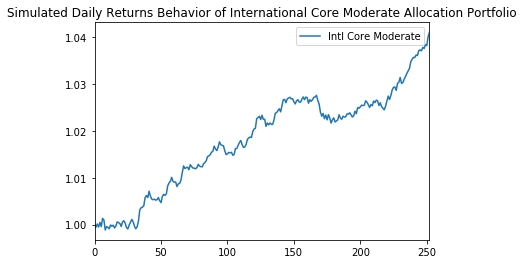

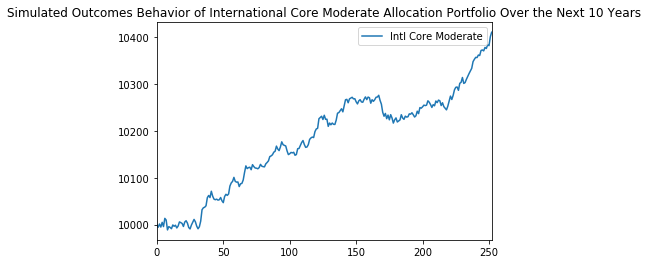

In [20]:
#7.
'INTERNATIONAL'
# intl_core_moderate_all = ["AOM"]
# intl_cc_df
# intl_cc_w

intl_cm_title="International Core Moderate Allocation"

MC_INTL_CM = MCSimulation(
    portfolio_data = intl_cm_df,
    weights = intl_cm_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CM.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cm_tbl = MC_INTL_CM.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cm_MEAN_returns_data = {"mean": list(MC_INTL_CM.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cm_simulated_MEAN_returns_df = pd.DataFrame(intl_cm_MEAN_returns_data)
intl_cm_simulated_MEAN_returns_df=intl_cm_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Moderate"})


# Use the `plot` function to visually analyze the trajectory 
intl_cm_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cm_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cm_cumulative_pnl = initial_investment * intl_cm_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cm_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cm_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


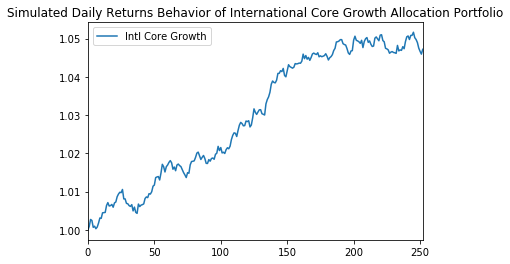

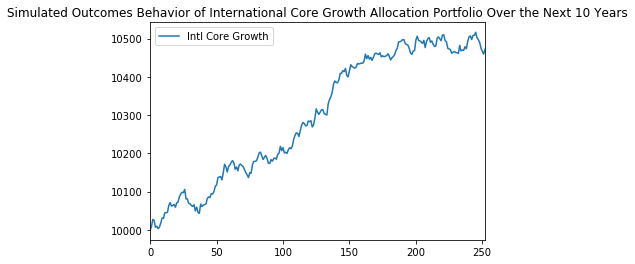

In [21]:
#8.
'INTERNATIONAL'
# intl_core_growth_all = ["AOR"]
# intl_cg_df
# intl_cg_w

intl_cg_title="International Core Growth Allocation"

MC_INTL_CG = MCSimulation(
    portfolio_data = intl_cg_df,
    weights = intl_cg_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CG.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_cg_tbl = MC_INTL_CG.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_cg_MEAN_returns_data = {"mean": list(MC_INTL_CG.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_cg_simulated_MEAN_returns_df = pd.DataFrame(intl_cg_MEAN_returns_data)
intl_cg_simulated_MEAN_returns_df=intl_cg_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Growth"})

# Use the `plot` function to visually analyze the trajectory 
intl_cg_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cg_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_cg_cumulative_pnl = initial_investment * intl_cg_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_cg_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cg_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


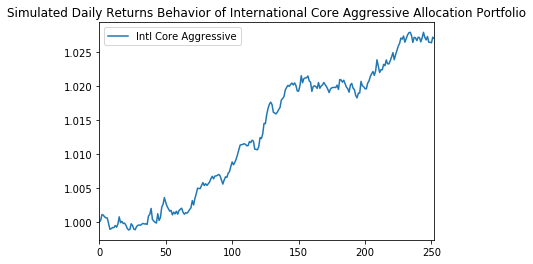

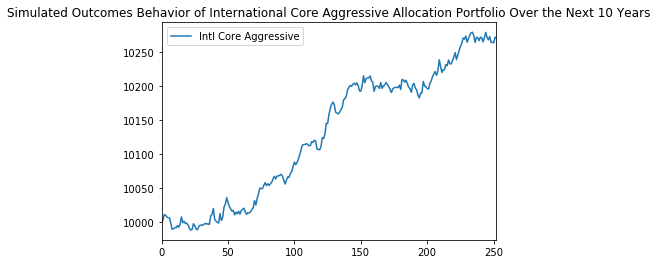

In [22]:
#9.
'INTERNATIONAL'
# intl_core_aggressive_all = ["AOK"]
# intl_ca_df
# intl_ca_w

intl_ca_title="International Core Aggressive Allocation"

MC_INTL_CA = MCSimulation(
    portfolio_data = intl_ca_df,
    weights = intl_ca_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_INTL_CA.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
intl_ca_tbl = MC_INTL_CA.summarize_cumulative_return()

# Compute mean from the simulated daily returns
intl_ca_MEAN_returns_data = {"mean": list(MC_INTL_CA.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
intl_ca_simulated_MEAN_returns_df = pd.DataFrame(intl_ca_MEAN_returns_data)
intl_ca_simulated_MEAN_returns_df=intl_ca_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Aggressive"})

# Use the `plot` function to visually analyze the trajectory 
intl_ca_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_ca_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
intl_ca_cumulative_pnl = initial_investment * intl_ca_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
intl_ca_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_ca_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


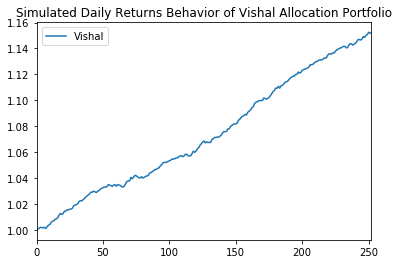

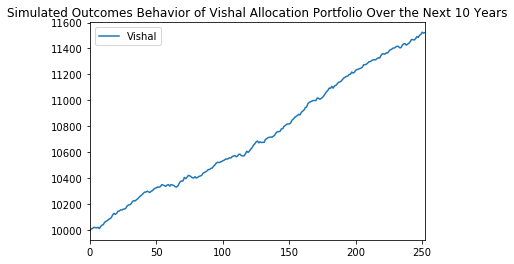

In [23]:
#10.
'SIGNATURE'
# 
# sig_vishal_df
# sig_vishal_w

sig_vishal_title="Vishal Allocation"

MC_SIG_VISHAL = MCSimulation(
    portfolio_data = sig_vishal_df,
    weights = sig_vishal_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_SIG_VISHAL.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
sig_vishal_tbl = MC_SIG_VISHAL.summarize_cumulative_return()

# Compute mean from the simulated daily returns
sig_vishal_MEAN_returns_data = {"mean": list(MC_SIG_VISHAL.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
sig_vishal_simulated_MEAN_returns_df = pd.DataFrame(sig_vishal_MEAN_returns_data)
sig_vishal_simulated_MEAN_returns_df=sig_vishal_simulated_MEAN_returns_df.rename(columns={"mean":"Vishal"})

# Use the `plot` function to visually analyze the trajectory 
sig_vishal_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {sig_vishal_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
sig_vishal_cumulative_pnl = initial_investment * sig_vishal_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
sig_vishal_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {sig_vishal_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


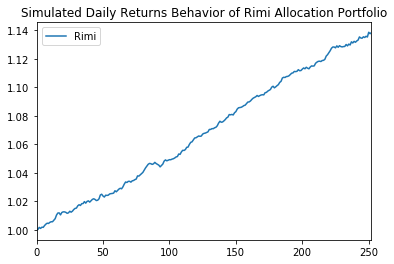

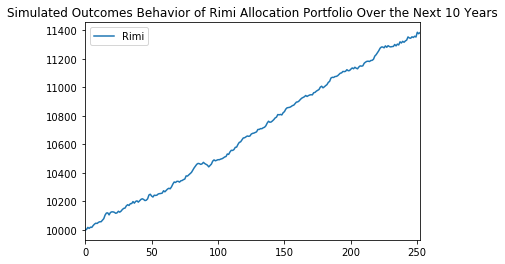

In [24]:
#11.
'SIGNATURE'
# 
# sig_rimi_df
# sig_rimi_w

sig_rimi_title="Rimi Allocation"

MC_SIG_RIMI = MCSimulation(
    portfolio_data = sig_rimi_df,
    weights = sig_rimi_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_SIG_RIMI.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
sig_rimi_tbl = MC_SIG_RIMI.summarize_cumulative_return()

# Compute mean from the simulated daily returns
sig_rimi_MEAN_returns_data = {"mean": list(MC_SIG_RIMI.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
sig_rimi_simulated_MEAN_returns_df = pd.DataFrame(sig_rimi_MEAN_returns_data)
sig_rimi_simulated_MEAN_returns_df=sig_rimi_simulated_MEAN_returns_df.rename(columns={"mean":"Rimi"})

# Use the `plot` function to visually analyze the trajectory 
sig_rimi_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {sig_rimi_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
sig_rimi_cumulative_pnl = initial_investment * sig_rimi_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
sig_rimi_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {sig_rimi_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


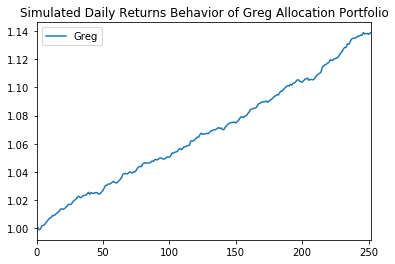

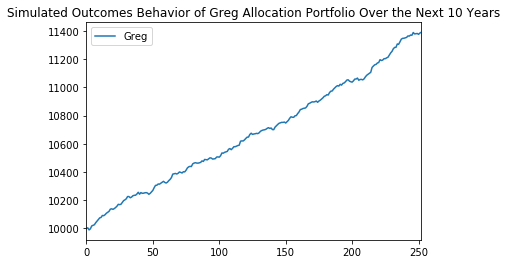

In [25]:
#12.
'SIGNATURE'
# 
# sig_greg_df
# sig_greg_w

sig_greg_title="Greg Allocation"

MC_SIG_GREG = MCSimulation(
    portfolio_data = sig_greg_df,
    weights = sig_greg_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_SIG_GREG.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
sig_greg_tbl = MC_SIG_GREG.summarize_cumulative_return()

# Compute mean from the simulated daily returns
sig_greg_MEAN_returns_data = {"mean": list(MC_SIG_GREG.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
sig_greg_simulated_MEAN_returns_df = pd.DataFrame(sig_greg_MEAN_returns_data)
sig_greg_simulated_MEAN_returns_df=sig_greg_simulated_MEAN_returns_df.rename(columns={"mean":"Greg"})

# Use the `plot` function to visually analyze the trajectory 
sig_greg_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {sig_greg_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
sig_greg_cumulative_pnl = initial_investment * sig_greg_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
sig_greg_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {sig_greg_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


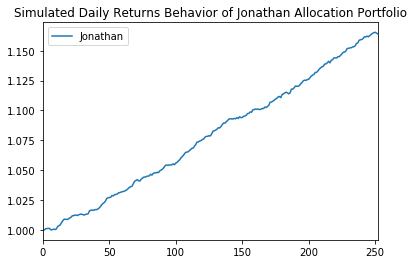

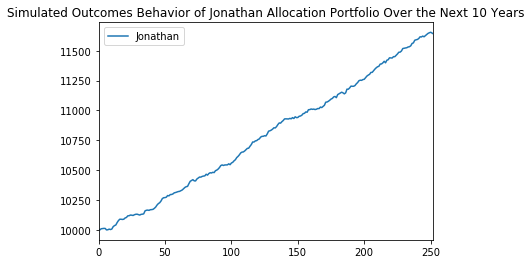

In [26]:
#13.
'SIGNATURE'
# 
# sig_jonathan_df
# sig_jonathan_w

sig_jonathan_title="Jonathan Allocation"

MC_SIG_JONATHAN = MCSimulation(
    portfolio_data = sig_jonathan_df,
    weights = sig_jonathan_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_SIG_JONATHAN.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
sig_jonathan_tbl = MC_SIG_JONATHAN.summarize_cumulative_return()

# Compute mean from the simulated daily returns
sig_jonathan_MEAN_returns_data = {"mean": list(MC_SIG_JONATHAN.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
sig_jonathan_simulated_MEAN_returns_df = pd.DataFrame(sig_jonathan_MEAN_returns_data)
sig_jonathan_simulated_MEAN_returns_df=sig_jonathan_simulated_MEAN_returns_df.rename(columns={"mean":"Jonathan"})

# Use the `plot` function to visually analyze the trajectory 
sig_jonathan_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {sig_jonathan_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
sig_jonathan_cumulative_pnl = initial_investment * sig_jonathan_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
sig_jonathan_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {sig_jonathan_title} Portfolio Over the Next 10 Years")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


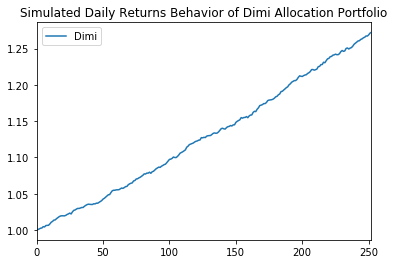

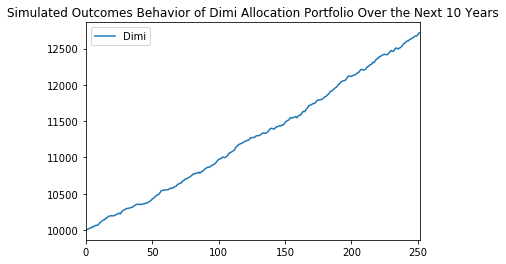

In [27]:
#14.
'SIGNATURE'
# 
# sig_dimi_df
# sig_dimi_w

sig_dimi_title="Dimi Allocation"

MC_SIG_DIMI = MCSimulation(
    portfolio_data = sig_dimi_df,
    weights = sig_dimi_w,
    num_simulation = ns,
    num_trading_days = ntd
)

# Run a Monte Carlo simulation to forecast cumulative returns
MC_SIG_DIMI.calc_cumulative_return()

# Fetch summary statistics from the Monte Carlo simulation results
sig_dimi_tbl = MC_SIG_DIMI.summarize_cumulative_return()

# Compute mean from the simulated daily returns
sig_dimi_MEAN_returns_data = {"mean": list(MC_SIG_DIMI.simulated_return.mean(axis=1)),}

# Create a DataFrame with the mean statistics
sig_dimi_simulated_MEAN_returns_df = pd.DataFrame(sig_dimi_MEAN_returns_data)
sig_dimi_simulated_MEAN_returns_df=sig_dimi_simulated_MEAN_returns_df.rename(columns={"mean":"Dimi"})

# Use the `plot` function to visually analyze the trajectory 
sig_dimi_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {sig_dimi_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
sig_dimi_cumulative_pnl = initial_investment * sig_dimi_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
sig_dimi_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {sig_dimi_title} Portfolio Over the Next 10 Years")

In [28]:
us_c_simulated_MEAN_returns_df.head()

,US Conservative
0,1.000000
1,1.001182
2,1.001489
3,1.002671
4,1.003784


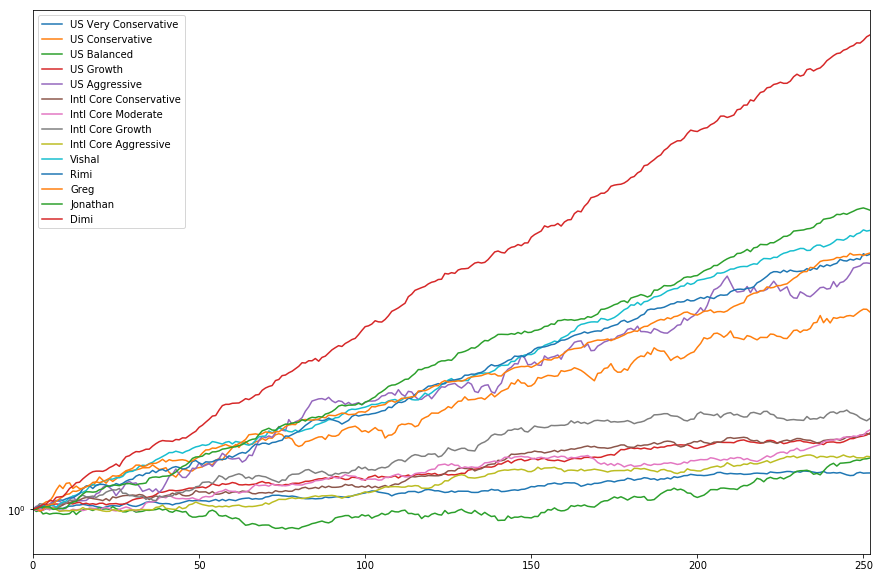

In [29]:
mean_forecasts_df = pd.concat([us_vc_simulated_MEAN_returns_df, 
                          us_c_simulated_MEAN_returns_df, 
                          us_b_simulated_MEAN_returns_df, 
                          us_g_simulated_MEAN_returns_df, 
                          us_ag_simulated_MEAN_returns_df,
                          intl_cc_simulated_MEAN_returns_df,
                          intl_cm_simulated_MEAN_returns_df,
                          intl_cg_simulated_MEAN_returns_df,
                          intl_ca_simulated_MEAN_returns_df, 
                          sig_vishal_simulated_MEAN_returns_df, 
                          sig_rimi_simulated_MEAN_returns_df, 
                          sig_greg_simulated_MEAN_returns_df, 
                          sig_jonathan_simulated_MEAN_returns_df, 
                          sig_dimi_simulated_MEAN_returns_df], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
mean_forecasts_df.plot(figsize=(15,10), logy=True)

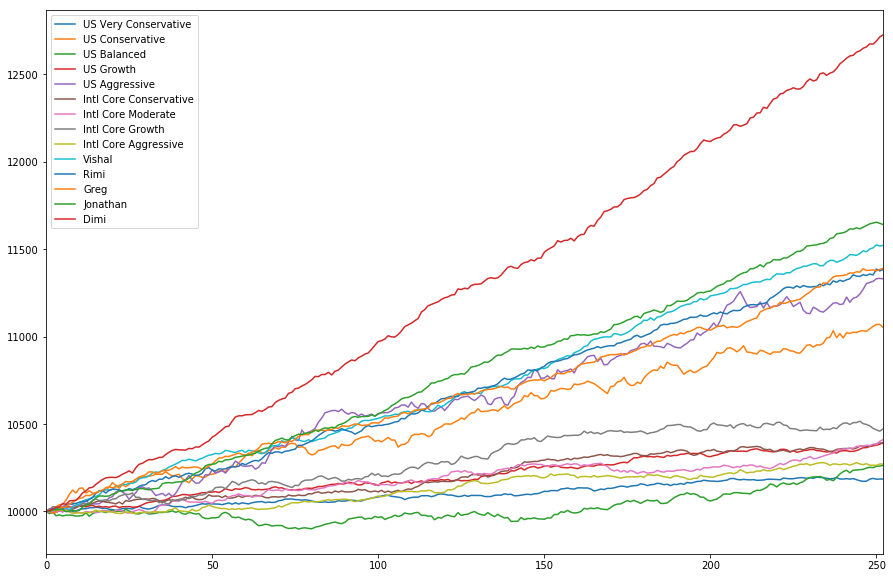

In [30]:
mean_pnl_forecasts_df = pd.concat([us_vc_cumulative_pnl, 
                          us_c_cumulative_pnl, 
                          us_b_cumulative_pnl, 
                          us_g_cumulative_pnl, 
                          us_ag_cumulative_pnl,
                          intl_cc_cumulative_pnl,
                          intl_cm_cumulative_pnl,
                          intl_cg_cumulative_pnl,
                          intl_ca_cumulative_pnl, 
                          sig_vishal_cumulative_pnl, 
                          sig_rimi_cumulative_pnl, 
                          sig_greg_cumulative_pnl, 
                          sig_jonathan_cumulative_pnl, 
                          sig_dimi_cumulative_pnl], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
mean_pnl_forecasts_df.plot(figsize=(15,10), logy=False)

# us_vc_cumulative_pnl